## Análise de Microdados Enem 2016

Base de dados trata-se de uma amostra de inscrições no ENEM de 2016, onde será analisado 
como é possível segmentar os inscritos de forma clara e objetiva com o intuito de justificar 
investimentos em educação destinados a certas parcelas de alunos.

In [1]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_enem = pd.read_csv("Microdados_Enem_2016.csv",sep=",",encoding="UTF8")

### Analise Exploratória

In [3]:
df_enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
print('*** Quantidade de Colunas e Linhas')
df_enem.shape

*** Quantidade de Colunas e Linhas


(13730, 167)

In [5]:
print('*** Colunas da base de dados')
df_enem.columns.values

*** Colunas da base de dados


array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

 ### Data Wrangling - Exploração, Limpeza e trasnformação

In [6]:
# Colunas Selecionadas de acordo com o critério especificado
columns_filter = [
    'NU_INSCRICAO',
    'NO_MUNICIPIO_RESIDENCIA', 
    'SG_UF_RESIDENCIA',
    'NU_IDADE', 
    'TP_SEXO', 
    'TP_ESTADO_CIVIL', 
    'TP_COR_RACA',
    'IN_GESTANTE',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006', 
    'Q047', 
    'Q050']

In [7]:
df_enem_col_filter = df_enem.filter(items=columns_filter)

In [8]:
print('*** Dataframe apenas com as colunas selecionadas')
df_enem_col_filter.head()

*** Dataframe apenas com as colunas selecionadas


,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,IN_GESTANTE,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q047,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,Porto Alegre,RS,24,M,0.0,1,0,436.3,495.4,...,120.0,120.0,80.0,80.0,520.0,D,D,C,A,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,Granja,CE,17,F,0.0,3,0,474.5,544.1,...,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,Fortaleza,CE,21,F,0.0,3,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,Rio de Janeiro,RJ,25,F,0.0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,H,E,E,D,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,Manaus,AM,28,M,0.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A


In [9]:
#Calculando a Nota Geral
df_enem_col_filter['NOTA_GERAL'] =  df_enem_col_filter.NU_NOTA_COMP1 +\
    df_enem_col_filter.NU_NOTA_COMP2 + \
    df_enem_col_filter.NU_NOTA_COMP3 + \
    df_enem_col_filter.NU_NOTA_COMP4 + \
    df_enem_col_filter.NU_NOTA_COMP5 

In [10]:
print('*** Informação do meu Dataframe com as colunas selecionadas')
df_enem_col_filter.info()

*** Informação do meu Dataframe com as colunas selecionadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NU_INSCRICAO             13730 non-null  object 
 1   NO_MUNICIPIO_RESIDENCIA  13730 non-null  object 
 2   SG_UF_RESIDENCIA         13730 non-null  object 
 3   NU_IDADE                 13730 non-null  int64  
 4   TP_SEXO                  13730 non-null  object 
 5   TP_ESTADO_CIVIL          13202 non-null  float64
 6   TP_COR_RACA              13730 non-null  int64  
 7   IN_GESTANTE              13730 non-null  int64  
 8   NU_NOTA_CN               10341 non-null  float64
 9   NU_NOTA_CH               10341 non-null  float64
 10  NU_NOTA_LC               10133 non-null  float64
 11  NU_NOTA_MT               10133 non-null  float64
 12  NU_NOTA_COMP1            10133 non-null  float64
 13  NU_NOTA_COMP2   

In [11]:
print('*** Verificando valores nulos')
df_enem_col_filter.isnull().sum()

*** Verificando valores nulos


NU_INSCRICAO                  0
NO_MUNICIPIO_RESIDENCIA       0
SG_UF_RESIDENCIA              0
NU_IDADE                      0
TP_SEXO                       0
TP_ESTADO_CIVIL             528
TP_COR_RACA                   0
IN_GESTANTE                   0
NU_NOTA_CN                 3389
NU_NOTA_CH                 3389
NU_NOTA_LC                 3597
NU_NOTA_MT                 3597
NU_NOTA_COMP1              3597
NU_NOTA_COMP2              3597
NU_NOTA_COMP3              3597
NU_NOTA_COMP4              3597
NU_NOTA_COMP5              3597
NU_NOTA_REDACAO            3597
Q001                          0
Q002                          0
Q006                          0
Q047                          0
Q050                          0
NOTA_GERAL                 3597
dtype: int64

Foi verificado que a variavel de estado civil a informação nula é proviniente a candidatos que não responderam a questão.
Os nulos dessa variavel foi trasformado 4 - Não Informado

In [12]:
print('*** Transformando a Informação de Estado Civil')
df_enem_col_filter['TP_ESTADO_CIVIL'] = df_enem_col_filter['TP_ESTADO_CIVIL'].replace(np.nan, 4)
df_enem_col_filter.isnull().sum()

*** Transformando a Informação de Estado Civil


NU_INSCRICAO                  0
NO_MUNICIPIO_RESIDENCIA       0
SG_UF_RESIDENCIA              0
NU_IDADE                      0
TP_SEXO                       0
TP_ESTADO_CIVIL               0
TP_COR_RACA                   0
IN_GESTANTE                   0
NU_NOTA_CN                 3389
NU_NOTA_CH                 3389
NU_NOTA_LC                 3597
NU_NOTA_MT                 3597
NU_NOTA_COMP1              3597
NU_NOTA_COMP2              3597
NU_NOTA_COMP3              3597
NU_NOTA_COMP4              3597
NU_NOTA_COMP5              3597
NU_NOTA_REDACAO            3597
Q001                          0
Q002                          0
Q006                          0
Q047                          0
Q050                          0
NOTA_GERAL                 3597
dtype: int64

In [13]:
print('*** Removendo os candidatos que não realizou algumas das provas')
df_enem_col_filter.dropna(inplace=True)
df_enem_col_filter.shape

*** Removendo os candidatos que não realizou algumas das provas


(10097, 24)

In [14]:
# transformando os dados das variveis para melhor analise e exibição

estado_civil_dic = {
    0:'Solteiro(a)',
    1:'Casado(a)/Mora com companheiro(a)',
    2:'Divorciado(a)/Desquitado(a)/Separado(a)',
    3:'Viúvo(a)',
    4:'Não Informado'}

raca_cor_dic = {
    0:'Não declarado',
    1:'Branca',
    2:'Preta',
    3:'Parda',
    4:'Amarela',
    5:'Indígena ',
    6:'Não dispõe da informação'}

gestante_dic = {
    1:'Sim',
    0:'Não'}

q001_dic = {
    'A':'Nunca estudou.',
    'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':'Completou a Pós-graduação.','H':'Não sei.'}

q002_dic = {
    'A':'Nunca estudou.',
    'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G':'Completou a Pós-graduação.',
    'H':'Não sei.'}

q006_dic = {
    'A':'Nenhuma renda.',
    'B':'Até R$ 880,00.',
    'C':'De R$ 880,01 até R$ 1.320,00.',
    'D':'De R$ 1.320,01 até R$ 1.760,00.',
    'E':'De R$ 1.760,01 até R$ 2.200,00.',
    'F':'De R$ 2.200,01 até R$ 2.640,00.',
    'G':'De R$ 2.640,01 até R$ 3.520,00.',
    'H':'De R$ 3.520,01 até R$ 4.400,00.',
    'I':'De R$ 4.400,01 até R$ 5.280,00.',
    'J':'De R$ 5.280,01 até R$ 6.160,00.',
    'K':'De R$ 6.160,01 até R$ 7.040,00.',
    'L':'De R$ 7.040,01 até R$ 7.920,00.',
    'M':'De R$ 7.920,01 até R$ 8.800,00.',
    'N':'De R$ 8.800,01 até R$ 10.560,00.',
    'O':'De R$ 10.560,01 até R$ 13.200,00.',
    'P':'De R$ 13.200,01 até R$ 17.600,00.',
    'Q':'Mais de R$ 17.600,00.'}

q047_dic = {
'A':'Somente em escola pública.',
'B':'Parte em escola pública e parte em escola privada sem bolsa de estudo integral.',
'C':'Parte em escola pública e parte em escola privada com bolsa de estudo integral.',
'D':'Somente em escola privada sem bolsa de estudo integral.',
'E':'Somente em escola privada com bolsa de estudo integral.'}


q050_dic = {
    'A':'Não abandonei, nem fui reprovado.',
    'B':'Não abandonei, mas fui reprovado.',
    'C':'Abandonei, mas não fui reprovado.',
    'D':'Abandonei e fui reprovado.'}

In [15]:
df_enem_col_filter['DESC_ESTADO_CIVIL'] = [estado_civil_dic[r] for r in df_enem_col_filter.TP_ESTADO_CIVIL]
df_enem_col_filter['DESC_RACA_COR'] = [raca_cor_dic[r] for r in df_enem_col_filter.TP_COR_RACA]
df_enem_col_filter['DESC_GESTANTE'] = [gestante_dic[r] for r in df_enem_col_filter.IN_GESTANTE]
df_enem_col_filter['DESC_Q001'] = [q001_dic[r] for r in df_enem_col_filter.Q001]
df_enem_col_filter['DESC_Q002'] = [q002_dic[r] for r in df_enem_col_filter.Q002]
df_enem_col_filter['DESC_Q006'] = [q006_dic[r] for r in df_enem_col_filter.Q006]
df_enem_col_filter['DESC_Q047'] = [q047_dic[r] for r in df_enem_col_filter.Q047]
df_enem_col_filter['DESC_Q050'] = [q050_dic[r] for r in df_enem_col_filter.Q050]

 ### Exploração

#### Sexo dos Candidatos que prestaram o Enem

In [16]:
df_enem_col_filter.filter(['NU_INSCRICAO','TP_SEXO']).groupby('TP_SEXO').count()

,NU_INSCRICAO
TP_SEXO,
F,6238
M,3859


Text(0, 0.5, 'Quantidade de Candidatos')

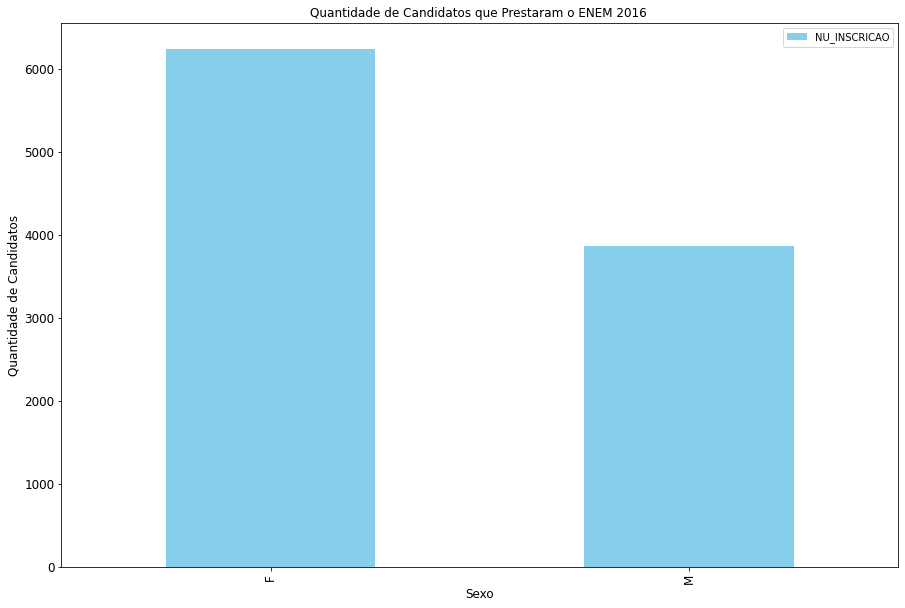

In [17]:
df = df_enem_col_filter.filter(['NU_INSCRICAO','TP_SEXO']).groupby('TP_SEXO').count()
ax = df.plot(kind='bar', title ="Quantidade de Candidatos que Prestaram o ENEM 2016 ",figsize=(15,10),fontsize=12,color='skyblue')
ax.set_xlabel("Sexo",fontsize=12)
ax.set_ylabel("Quantidade de Candidatos",fontsize=12)

#### Idade dos Candidatos
Foi verificado que a menor idade do candidato foi 13 anos enquanto a maior foi 66 anos, sendo que média dos candidatos que prestaram a prova estão entre  os 20 anos

In [18]:
df_enem_col_filter.NU_IDADE.describe()

count    10097.000000
mean        20.575517
std          6.345231
min         13.000000
25%         17.000000
50%         18.000000
75%         21.000000
max         66.000000
Name: NU_IDADE, dtype: float64

#### Quantidade de Candidatos por Estado

In [19]:
df_enem_col_filter.SG_UF_RESIDENCIA.value_counts()

SP    1532
CE    1367
MG    1008
BA     661
RJ     540
PE     466
PA     463
MA     461
PR     449
GO     382
RS     378
PB     250
PI     232
ES     211
SC     209
MT     189
RN     185
AM     170
AL     167
DF     161
SE     151
TO     132
MS     130
RO      81
AP      52
AC      48
RR      22
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0, 0.5, 'Quantidade de Candidatos')

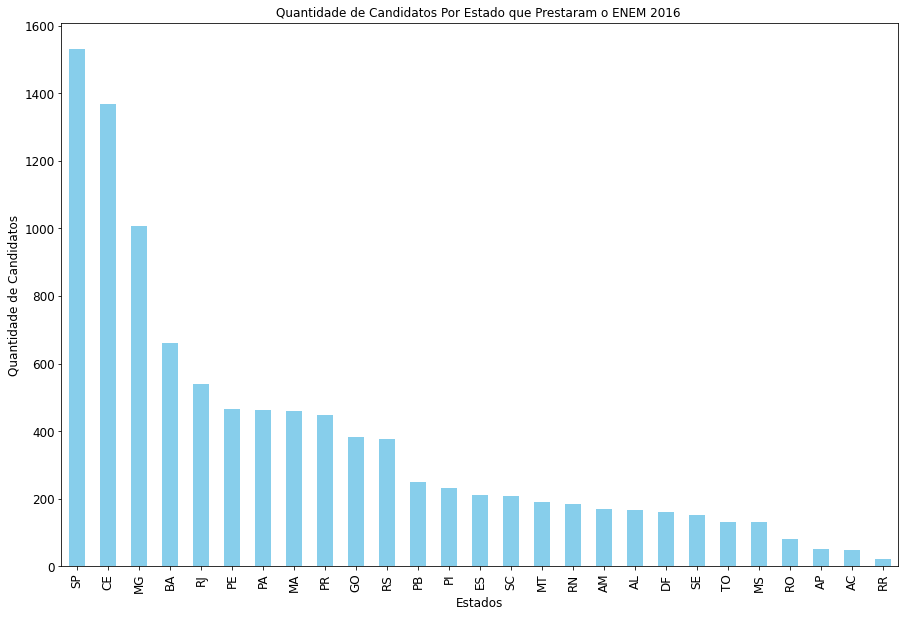

In [20]:
df = df_enem_col_filter.SG_UF_RESIDENCIA.value_counts()
ax = df.plot(kind='bar', title ="Quantidade de Candidatos Por Estado que Prestaram o ENEM 2016 ",figsize=(15,10), fontsize=12,color='skyblue')
ax.set_xlabel("Estados",fontsize=12)
ax.set_ylabel("Quantidade de Candidatos",fontsize=12)

#### Estado Civil dos Candidatos

In [21]:
df_enem_col_filter.filter(items=['NU_INSCRICAO','DESC_ESTADO_CIVIL']).groupby('DESC_ESTADO_CIVIL').count().sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_ESTADO_CIVIL,
Solteiro(a),9060
Casado(a)/Mora com companheiro(a),638
Não Informado,316
Divorciado(a)/Desquitado(a)/Separado(a),75
Viúvo(a),8


Text(0.5, 0, 'Quantidade de Candidatos')

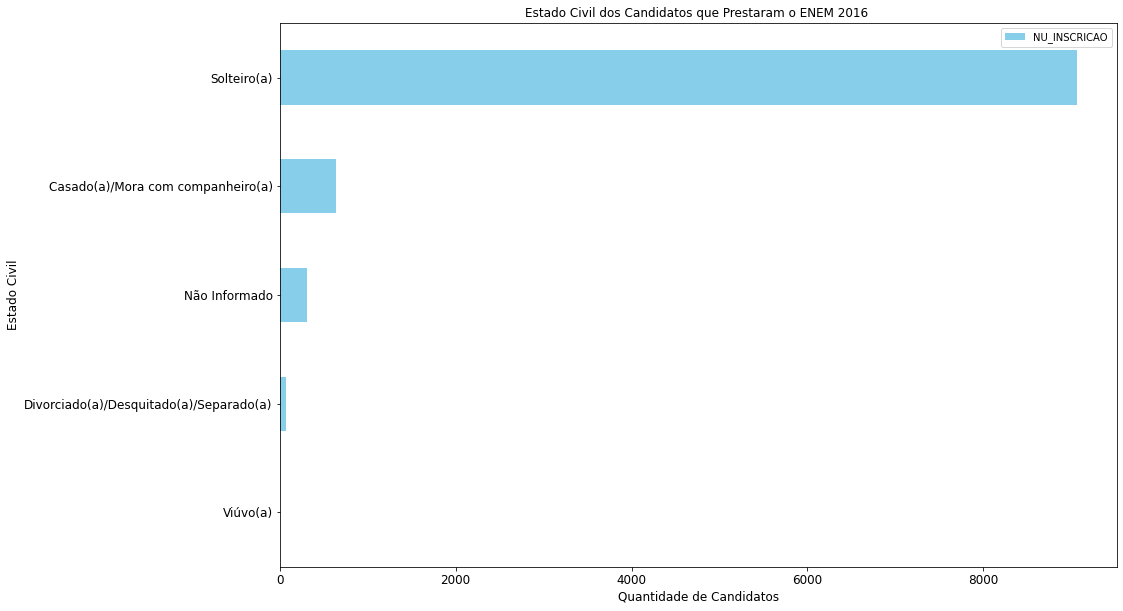

In [22]:
df = df_enem_col_filter.filter(items=['NU_INSCRICAO','DESC_ESTADO_CIVIL'])\
                       .groupby('DESC_ESTADO_CIVIL').count().sort_values(by='NU_INSCRICAO',ascending=True)

ax = df.plot(kind='barh', title ="Estado Civil dos Candidatos que Prestaram o ENEM 2016 ",figsize=(15,10), fontsize=12,color='skyblue')
ax.set_ylabel("Estado Civil",fontsize=12)
ax.set_xlabel("Quantidade de Candidatos",fontsize=12)

Text(0.5, 0, 'Média da Nota Geral')

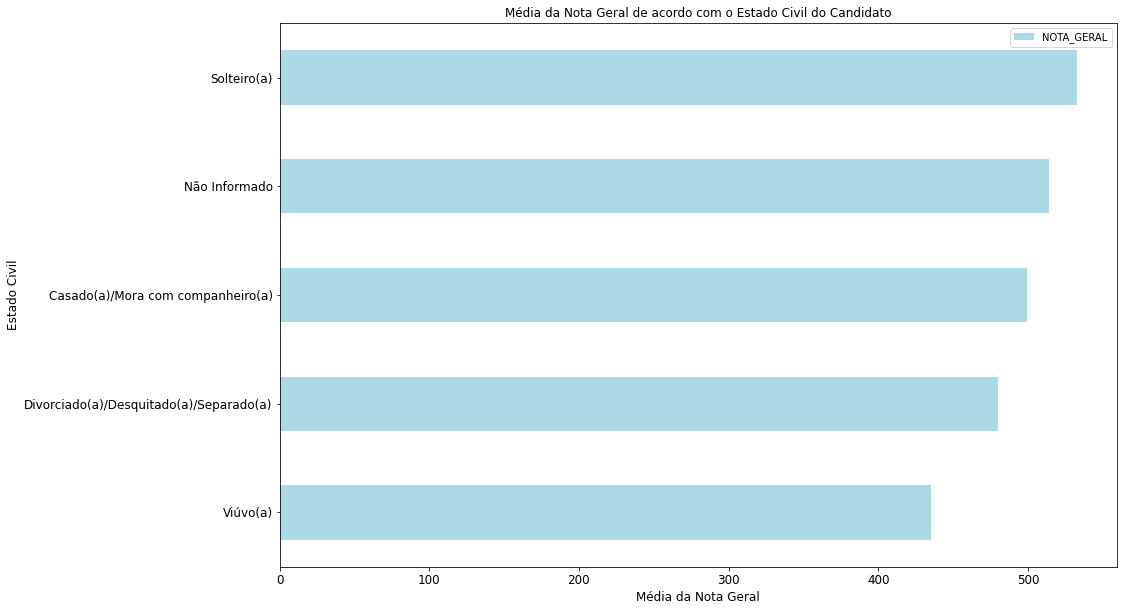

In [23]:
df = df_enem_col_filter.filter(['DESC_ESTADO_CIVIL','NOTA_GERAL']).groupby('DESC_ESTADO_CIVIL').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral de acordo com o Estado Civil do Candidato",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Estado Civil",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

#### Raça e Cor do Candidato

In [24]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_RACA_COR'])\
                    .groupby('DESC_RACA_COR').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_RACA_COR,
Parda,4887
Branca,3456
Preta,1297
Amarela,226
Não declarado,167
Indígena,64


Text(0.5, 0, 'Quantidade de Candidatos')

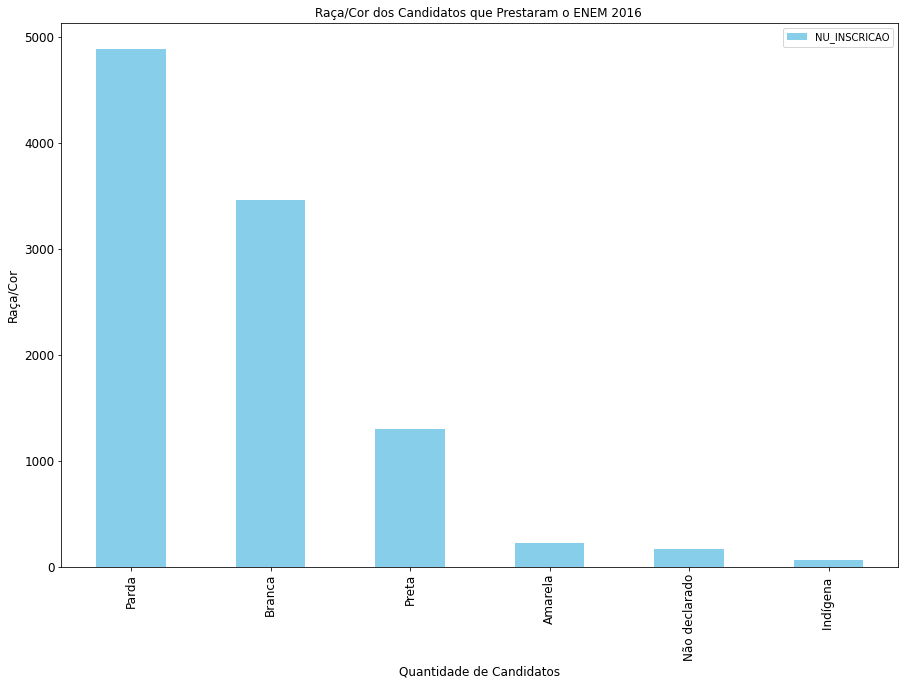

In [25]:
df = df_enem_col_filter.filter(['NU_INSCRICAO','DESC_RACA_COR']).groupby('DESC_RACA_COR').count()\
                        .sort_values(by='NU_INSCRICAO',ascending=False)

ax = df.plot(kind='bar', title ="Raça/Cor dos Candidatos que Prestaram o ENEM 2016 ",figsize=(15,10), fontsize=12, color='skyblue')
ax.set_ylabel("Raça/Cor",fontsize=12)
ax.set_xlabel("Quantidade de Candidatos",fontsize=12)

Text(0.5, 0, 'Média da Nota Geral')

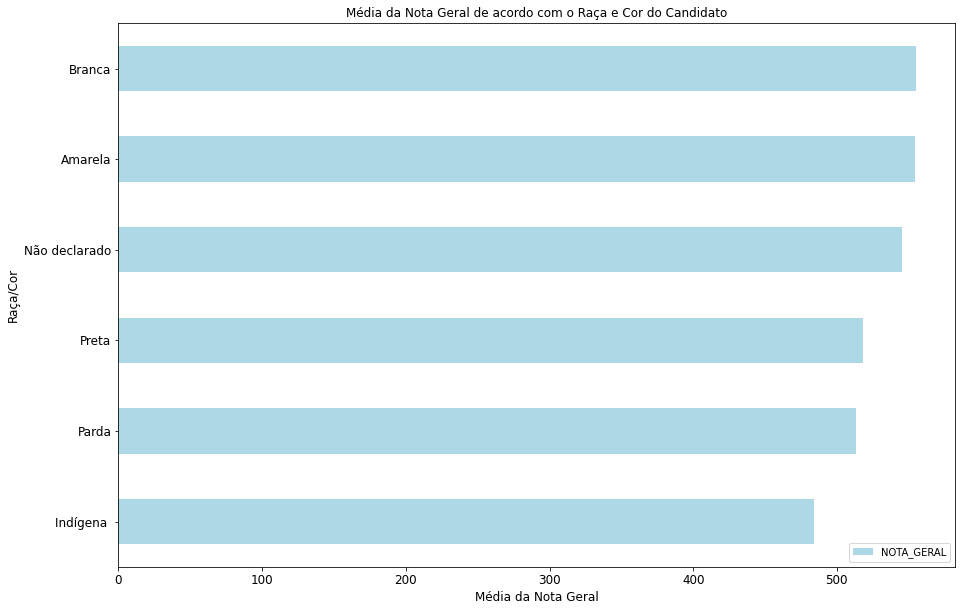

In [26]:
df = df_enem_col_filter.filter(['DESC_RACA_COR','NOTA_GERAL']).groupby('DESC_RACA_COR').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral de acordo com o Raça e Cor do Candidato",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Raça/Cor",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

#### Gestantes

In [27]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_GESTANTE']).groupby('DESC_GESTANTE').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_GESTANTE,
Não,10093
Sim,4


#### Analisando o dados da Q001: Até que série seu pai, ou o homem responsável por você, estudou?
Quantidades de Pai ou Homem responsavel pelo candidato

In [28]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_Q001']).groupby('DESC_Q001').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",2404
Não completou a 4ª série/5º ano do Ensino Fundamental.,2287
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",1587
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",1270
Não sei.,1053
Nunca estudou.,605
"Completou a Faculdade, mas não completou a Pós-graduação.",602
Completou a Pós-graduação.,289


Text(0.5, 0, 'Média da Nota Geral')

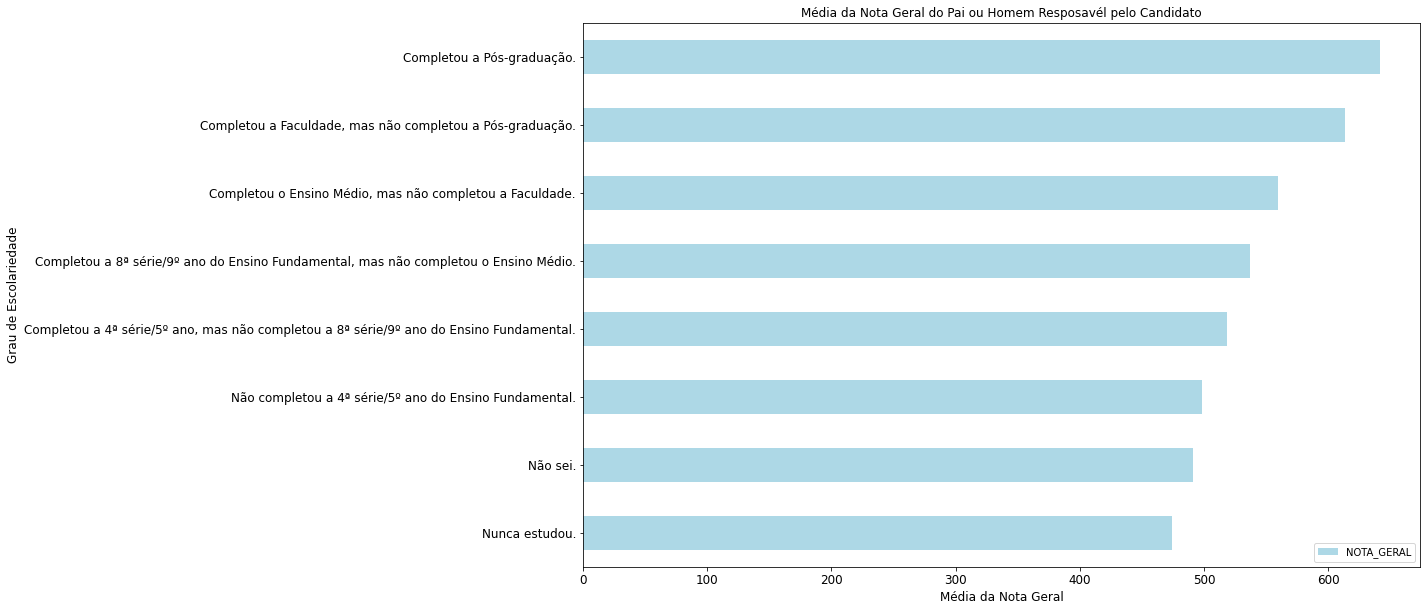

In [29]:

df = df_enem_col_filter.filter(['DESC_Q001','NOTA_GERAL']).groupby('DESC_Q001').mean().sort_values(by='NOTA_GERAL',ascending=True)

ax = df.plot(kind='barh', title ="Média da Nota Geral do Pai ou Homem Resposavél pelo Candidato",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Grau de Escolariedade",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)


#### Analisando o dados da Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?
Quantidades de Mãe ou Mulher responsavel pelo candidato

In [30]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_Q002']).groupby('DESC_Q002').count().sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",2993
Não completou a 4ª série/5º ano do Ensino Fundamental.,1775
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",1549
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",1503
"Completou a Faculdade, mas não completou a Pós-graduação.",825
Completou a Pós-graduação.,556
Não sei.,512
Nunca estudou.,384


Text(0.5, 0, 'Média da Nota Geral')

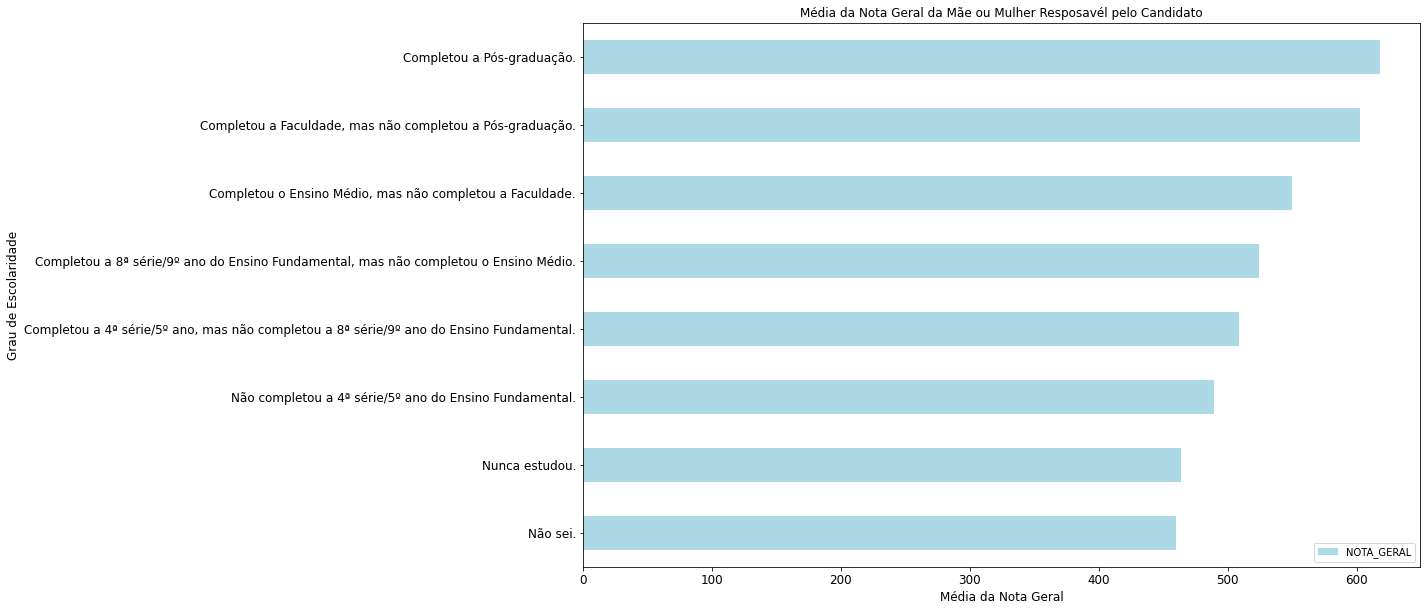

In [31]:
df = df_enem_col_filter.filter(['DESC_Q002','NOTA_GERAL']).groupby('DESC_Q002').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral da Mãe ou Mulher Resposavél pelo Candidato",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Grau de Escolaridade",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

#### Analisando o dados da Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
Soma das rendas dos familiares por Candidato

In [32]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_Q006']).groupby('DESC_Q006').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_Q006,
"Até R$ 880,00.",3143
"De R$ 880,01 até R$ 1.320,00.",2547
"De R$ 1.320,01 até R$ 1.760,00.",1157
"De R$ 1.760,01 até R$ 2.200,00.",764
"De R$ 2.200,01 até R$ 2.640,00.",500
"De R$ 2.640,01 até R$ 3.520,00.",496
"De R$ 3.520,01 até R$ 4.400,00.",362
Nenhuma renda.,331
"De R$ 4.400,01 até R$ 5.280,00.",219


Text(0.5, 0, 'Média da Nota Geral')

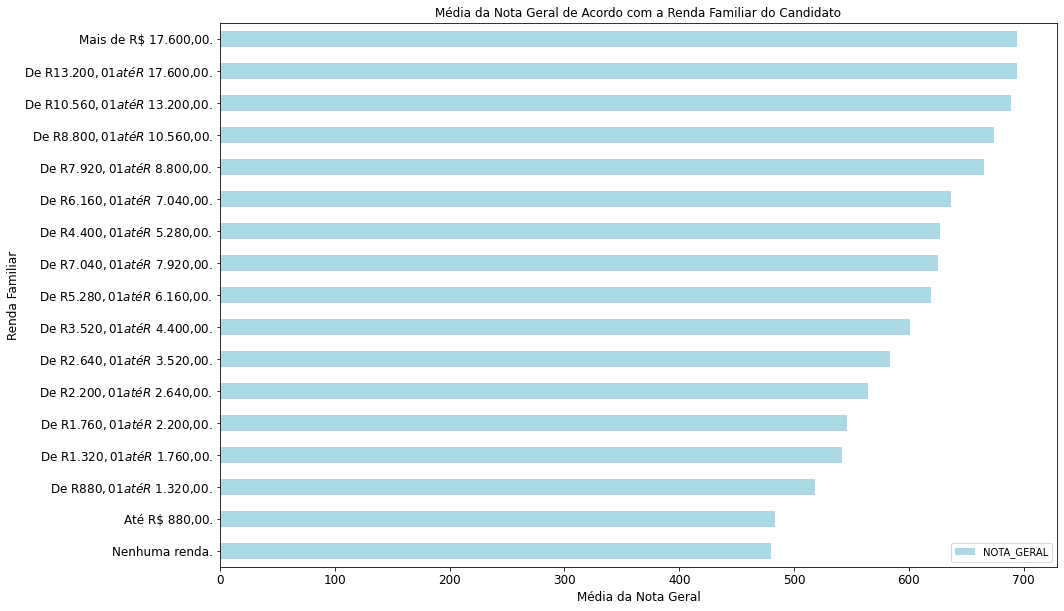

In [33]:
df = df_enem_col_filter.filter(['DESC_Q006','NOTA_GERAL']).groupby('DESC_Q006').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral de Acordo com a Renda Familiar do Candidato",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Renda Familiar",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

#### Analisando o dados da Q047: Em que tipo de escola você frequentou o Ensino Médio?
Tipo de Escola que o candidato cursou

In [34]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_Q047']).groupby('DESC_Q047').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_Q047,
Somente em escola pública.,8425
Somente em escola privada sem bolsa de estudo integral.,1029
Somente em escola privada com bolsa de estudo integral.,272
Parte em escola pública e parte em escola privada sem bolsa de estudo integral.,247
Parte em escola pública e parte em escola privada com bolsa de estudo integral.,124


In [40]:
df_enem_col_filter.filter(['DESC_Q047','NOTA_GERAL']).groupby('DESC_Q047').count().sort_values(by='NOTA_GERAL',ascending=True)

,NOTA_GERAL
DESC_Q047,
Parte em escola pública e parte em escola privada com bolsa de estudo integral.,124
Parte em escola pública e parte em escola privada sem bolsa de estudo integral.,247
Somente em escola privada com bolsa de estudo integral.,272
Somente em escola privada sem bolsa de estudo integral.,1029
Somente em escola pública.,8425


Text(0.5, 0, 'Média da Nota Geral')

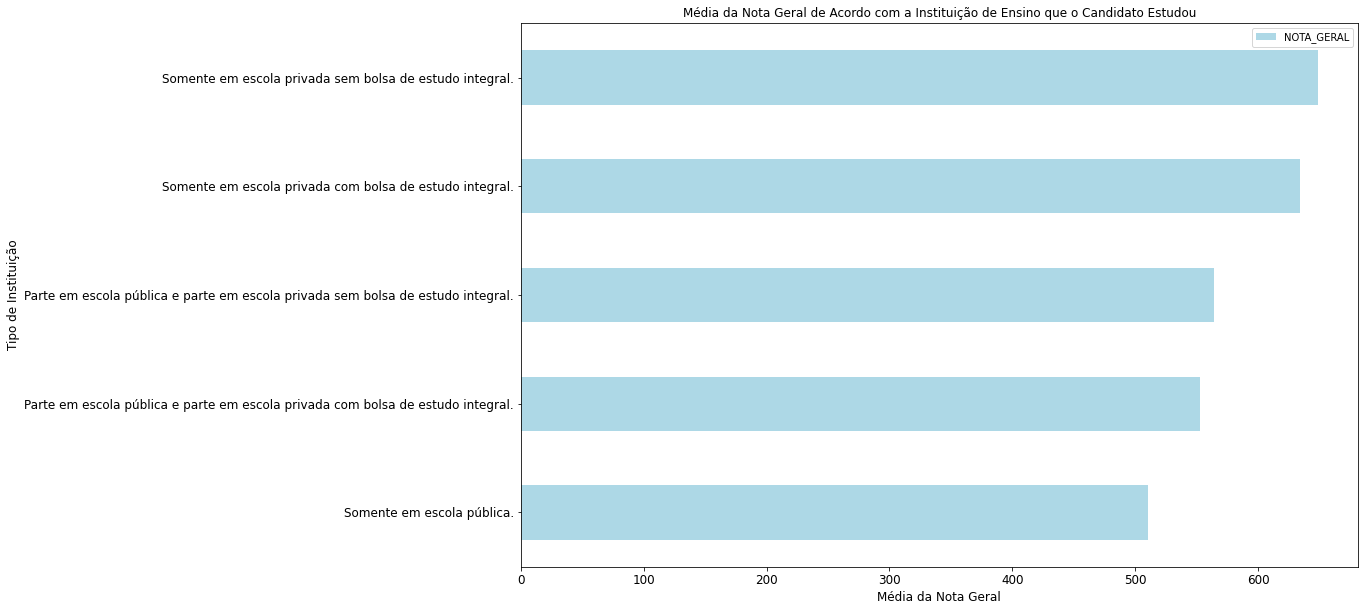

In [35]:
df = df_enem_col_filter.filter(['DESC_Q047','NOTA_GERAL']).groupby('DESC_Q047').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral de Acordo com a Instituição de Ensino que o Candidato Estudou",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Tipo de Instituição",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

#### Analisando o dados da Q050: Durante o Ensino Médio, você abandonou os estudos por algum tempo e/ou foi reprovado?
Tipo de conclusão dos candidatos

In [36]:
df_enem_col_filter.filter(['NU_INSCRICAO','DESC_Q050']).groupby('DESC_Q050').count()\
                    .sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
DESC_Q050,
"Não abandonei, nem fui reprovado.",8515
"Não abandonei, mas fui reprovado.",819
"Abandonei, mas não fui reprovado.",409
Abandonei e fui reprovado.,354


Text(0.5, 0, 'Média da Nota Geral')

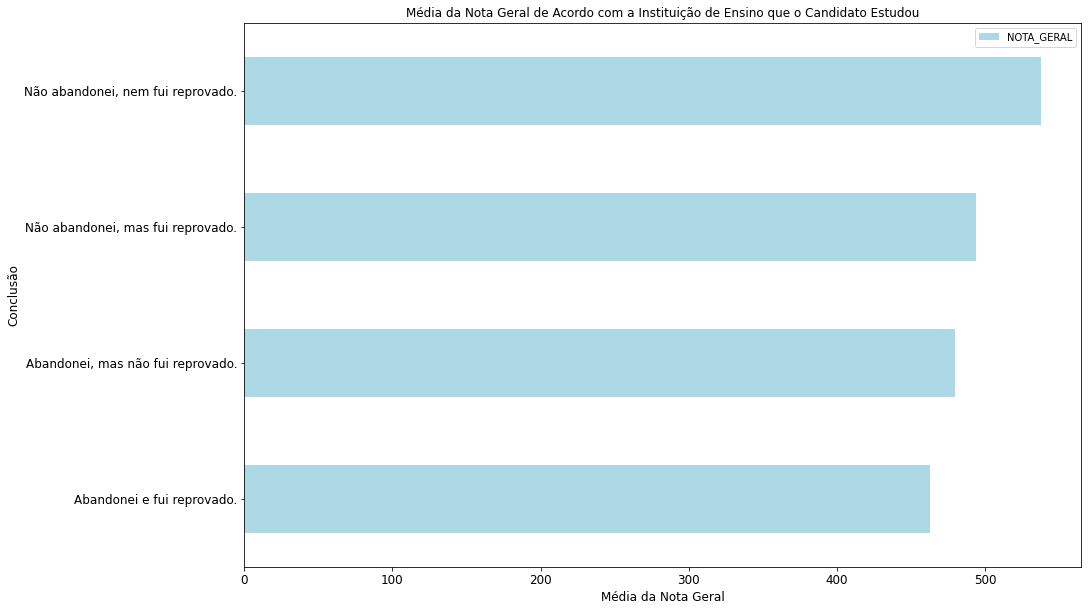

In [37]:
df = df_enem_col_filter.filter(['DESC_Q050','NOTA_GERAL']).groupby('DESC_Q050').mean().sort_values(by='NOTA_GERAL',ascending=True)
ax = df.plot(kind='barh', title ="Média da Nota Geral de Acordo com a Instituição de Ensino que o Candidato Estudou",figsize=(15,10), fontsize=12, color='lightblue')
ax.set_ylabel("Conclusão",fontsize=12)
ax.set_xlabel("Média da Nota Geral",fontsize=12)

### Salvando o dataframe tratado em formado XLSX

In [38]:
df_enem_col_filter.to_excel('database_enem_2016_tratado.xlsx', index = False)